In [27]:
# Load the required package
library(readr)
library(ggplot2)
library(dplyr)
library(lubridate)
# Define the file path (replace with your actual file path)
file_path <- "20230803.tsv"

# Read the TSV file into a DataFrame
df <- read_delim(file_path, delim = "\t")

# Print the DataFrame
print(df)

Rows: 4954 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): uuid, hubmap_id, status, group_name, data_type, dataset_type
lgl  (1): is_protected
dttm (2): created_datetime, published_datetime


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 4,954 × 9
   uuid   hubmap_id status group_name data_type dataset_type created_datetime   
   <chr>  <chr>     <chr>  <chr>      <chr>     <chr>        <dttm>             
 1 5c817… HBM425.N… Publi… Stanford … ['sn_ata… Derived      2023-05-26 00:00:46
 2 6039e… HBM329.S… Publi… Stanford … ['sn_ata… Derived      2023-06-26 09:02:28
 3 9e2b9… HBM222.Q… Publi… Stanford … ['sn_ata… Derived      2023-05-25 19:21:48
 4 2bc85… HBM494.V… Publi… Stanford … ['sn_ata… Derived      2023-06-26 09:02:10
 5 be0e1… HBM769.M… Publi… Stanford … ['sn_ata… Derived      2023-05-25 15:27:48
 6 ba2d4… HBM495.C… Publi… Stanford … ['sn_ata… Derived      2023-06-26 09:00:52
 7 10371… HBM486.F… Publi… Stanford … ['sn_ata… Derived      2023-05-25 05:11:21
 8 bc8c0… HBM287.T… Publi… Stanford … ['sn_ata… Derived      2023-05-25 04:29:52
 9 c262d… HBM946.C… Publi… Stanford … ['sn_ata… Derived      2023-05-25 02:58:54
10 21b17… HBM226.J… Publi… Stanford … ['sn_ata… Derived      2023-05-25 00:32:09
# … wi

In [28]:
install.packages(c("ggplot2", "reshape2", "scales"))
library(ggplot2)
library(reshape2)

Installing packages into ‘/jet/home/fshormin/R/x86_64-redhat-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



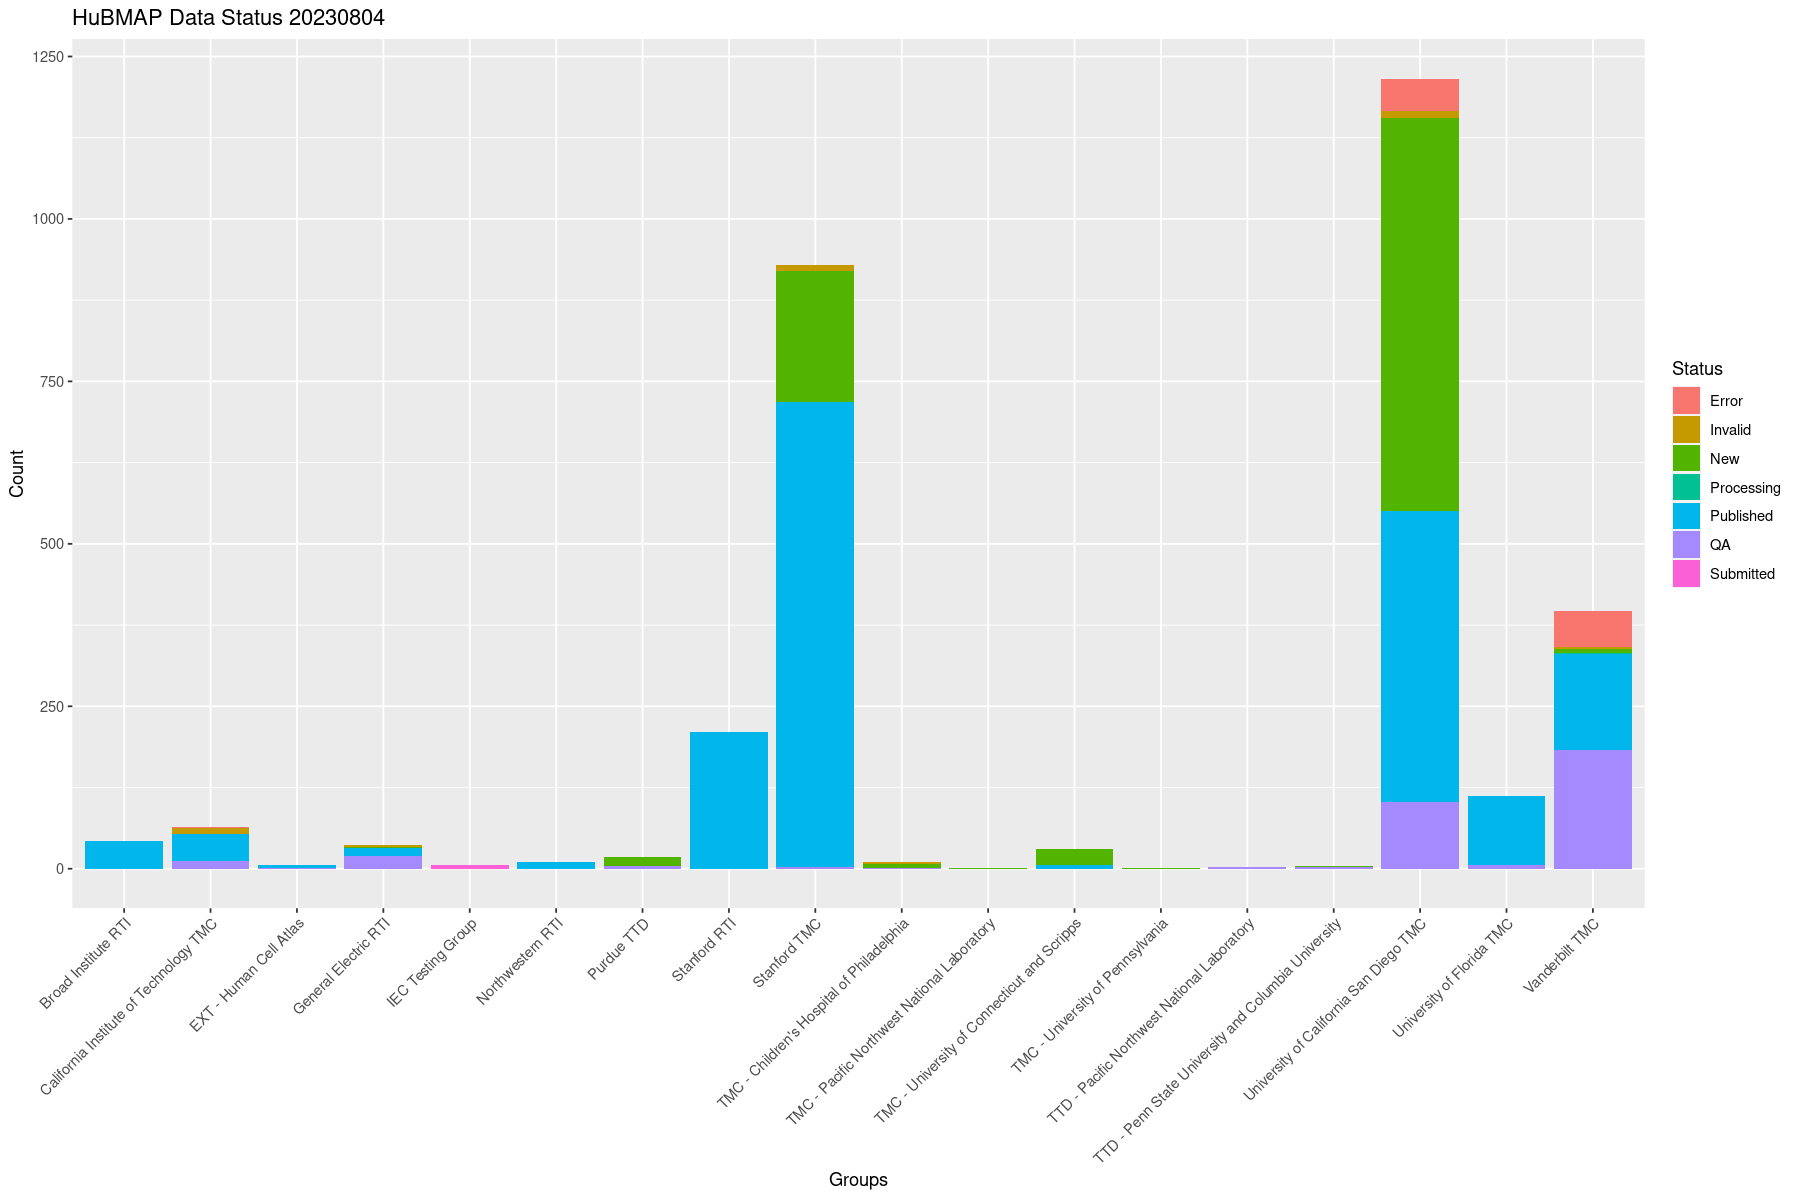

In [29]:
# Filter the data where 'dataset_type' is 'Primary'
df_primary <- df[df$dataset_type == 'Primary', ]

# Count the occurrences of each combination of 'group_name' and 'status'
count_df <- as.data.frame.matrix(table(df_primary$group_name, df_primary$status))

# Melt the data into a format suitable for ggplot
count_df$group_name <- row.names(count_df)
melted_df <- reshape2::melt(count_df, id.vars = "group_name", variable.name = "status", value.name = "count")

# Since we want log scale, we should transform the count
# melted_df$count <- log1p(melted_df$count) # log1p function is used to add 1 before applying log to avoid taking log of 0

# Plot
g <- ggplot(melted_df, aes(fill=status, y=count, x=group_name)) + 
  geom_bar(position="stack", stat="identity") +
  scale_y_continuous(labels = scales::math_format(.x)) + # To make y-axis labels human-readable
  labs(x = "Groups", y = "Count", fill = "Status") +
  ggtitle(paste("HuBMAP Data Status", format(Sys.time(), "%Y%m%d"))) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave(filename = "plot.png", plot = g, width = 40, height = 10, dpi = 500)

# Display the plot
print(g)


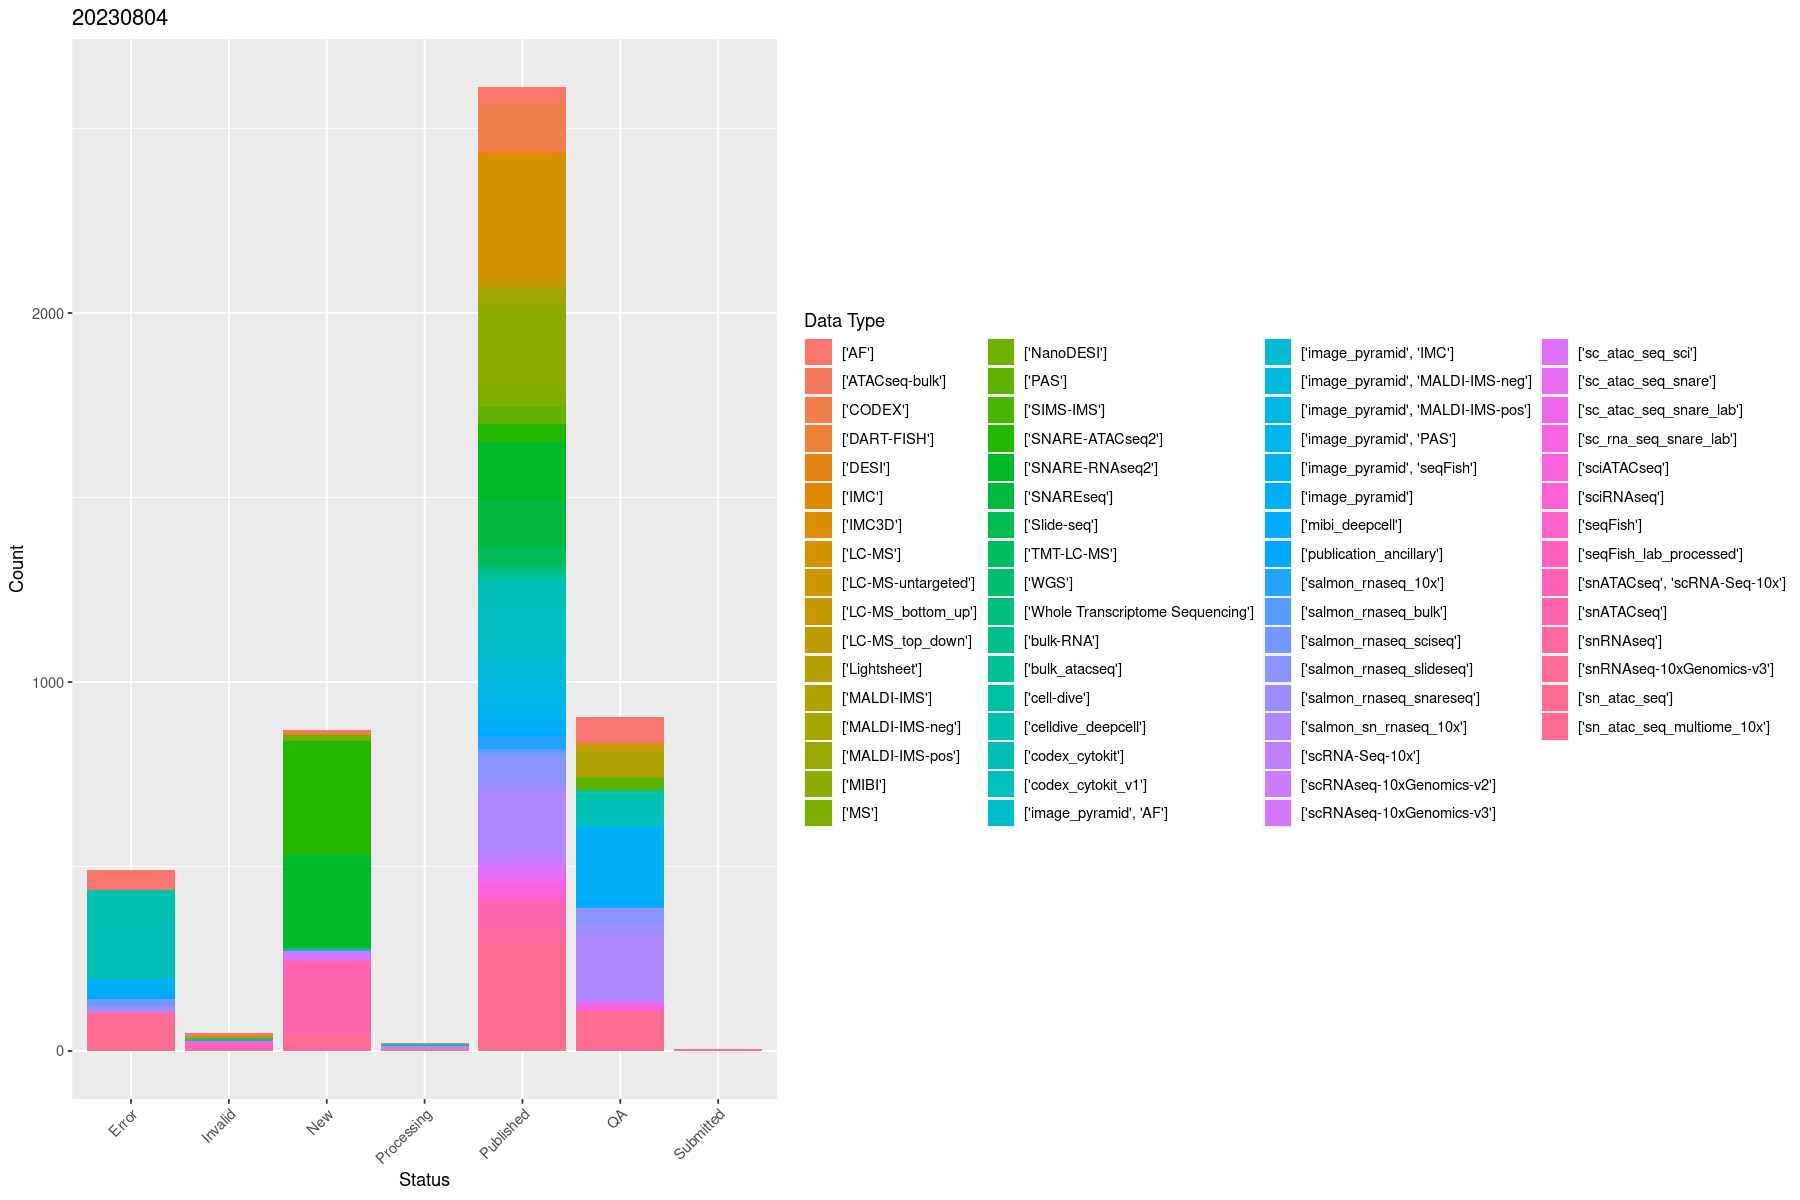

In [30]:
# Count the occurrences of each combination of 'status' and 'data_type'
count_df <- as.data.frame.matrix(table(df$status, df$data_type))

# Melt the data into a format suitable for ggplot
count_df$status <- row.names(count_df)
melted_df <- reshape2::melt(count_df, id.vars = "status", variable.name = "data_type", value.name = "count")

# Plot
g <- ggplot(melted_df, aes(fill=data_type, y=count, x=status)) + 
  geom_bar(position="stack", stat="identity") +
  labs(x = "Status", y = "Count", fill = "Data Type") +
  ggtitle(format(Sys.time(), "%Y%m%d")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave(filename = "plot.png", plot = g, width = 15, height = 10, dpi = 500)

# Display the plot
plot(g)